# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# import modules

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# read data

data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
print(data.head())

  id ad  education  ofjobs  yearsexp  honors  volunteer  military  empholes  \
0  b  1          4       2         6       0          0         0         1   
1  b  1          3       3         6       0          1         1         0   
2  b  1          4       1         6       0          0         0         0   
3  b  1          3       4         6       0          1         0         1   
4  b  1          3       3        22       0          0         0         0   

   occupspecific    ...      compreq  orgreq  manuf  transcom  bankreal trade  \
0             17    ...          1.0     0.0    1.0       0.0       0.0   0.0   
1            316    ...          1.0     0.0    1.0       0.0       0.0   0.0   
2             19    ...          1.0     0.0    1.0       0.0       0.0   0.0   
3            313    ...          1.0     0.0    1.0       0.0       0.0   0.0   
4            313    ...          1.0     1.0    0.0       0.0       0.0   0.0   

  busservice othservice  missind  owne

Q1. What test is appropriate for this problem? Does CLT apply?

     This is an example of a Bernoulli trial. We can perform hypothesis testing on the success of call backs. CLT would apply if our sample size is large enough (N > 30).

Call backs for black sounding names: 157.0
Call backs for white sounding names: 235.0
Number of applications submitted, i.e. number of trials: 2435
Success rate by race:
b: 0.064 w: 0.097


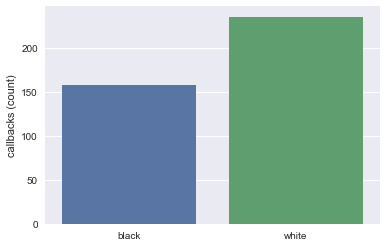

In [3]:
# callbacks by race

b = np.sum(data[data.race=='b'].call)
w = np.sum(data[data.race=='w'].call)
print('Call backs for black sounding names:', b)
print('Call backs for white sounding names:', w)

bc = data[data.race=='b'].call
wc = data[data.race=='w'].call
print('Number of applications submitted, i.e. number of trials:', len(bc))

print('Success rate by race:')
br = b/len(bc)
wr = w/len(wc)
print('b:', '{:.3f}'.format(br), 'w:', '{:.3f}'.format(wr))

_ = sns.barplot(x=['black', 'white'], y=[b, w])
_ = plt.ylabel('callbacks (count)')
plt.show()

Q2. What are the null and alternate hypotheses?

       H0: There is no difference between call back rates for black and white sounding names
       H1: There is a statistically significant difference, p: >= 0.05

Q3. Compute margin of error, confidence interval, and p-value.

In [4]:
se = ((br * (1-br))/len(bc) + (wr * (1-wr))/len(wc)) ** 0.5   # standard error
me = 1.96 * se                                                # margin of error for 95% confidence
print('Margin of error for 95% confidence:', me)

diff = wr - br
print('95% CI:', diff - me, diff + me)

z = diff/se  # z score for H0: diff = 0

print('z:', z)
p = 1 - stats.norm.cdf(z)
print('p =', p)

Margin of error for 95% confidence: 0.0152554063499
95% CI: 0.0167774478596 0.0472882605593
z: 4.11555043573
p = 1.93128260376e-05


Q4. Write a story describing the statistical significance in the context or the original problem.

    The small p value indicates that our original hypothesis must be rejected, i.e. there is a significant statistical difference between call back rates for black and white sounding names.

In [5]:
print('The difference in call back rates between black and white sounding names is',\
      '{:.3f}'.format(diff), '+-', '{:.3f}'.format(me), '.')

The difference in call back rates between black and white sounding names is 0.032 +- 0.015 .


Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

     This analysis did not take other factors into consideration. It is possible other factors have a stronger impact on call back rates than the applicant's name. It should also be noted that call back rates are very low for either race. Perhaps another test would be more appropriate to measure racial discrimination.